# Problem 03.2:
* Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
* The objective of this problem is to classify the wine quality.
- This dataset belogs to:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: 
  * [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
  * [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
  * [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

## 1. Imports: 

In [545]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)

filename = '/home/j/Personal/IA - Studies/3.MachineLearning-course/data-sets/winequality-white.csv'
white_df = pd.read_csv(filename, sep = ';')

In [546]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2. Feature Engineering:

In [547]:
white_df['quality'].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [548]:
white_df['level'] = pd.Series(dtype=str)

white_df['level'].loc[white_df['quality'].between(3,4)] = 'low'
white_df['level'].loc[white_df['quality'].between(5,7)] = 'medium'
white_df['level'].loc[white_df['quality'].between(8,9)]  = 'high'

white_df = white_df.drop('quality', axis = 1)

## 3. Splitting and Stratifying data:

#### Showing the distribuition of classes:

In [549]:
y = white_df.pop('level')
X = white_df.copy()

In [550]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y) # Using Scikit to split data

## 4. Data visualization and manipulation:

In [551]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 1610 to 4677
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3428 non-null   float64
 1   volatile acidity      3428 non-null   float64
 2   citric acid           3428 non-null   float64
 3   residual sugar        3428 non-null   float64
 4   chlorides             3428 non-null   float64
 5   free sulfur dioxide   3428 non-null   float64
 6   total sulfur dioxide  3428 non-null   float64
 7   density               3428 non-null   float64
 8   pH                    3428 non-null   float64
 9   sulphates             3428 non-null   float64
 10  alcohol               3428 non-null   float64
dtypes: float64(11)
memory usage: 321.4 KB


In [552]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,6.847170,0.278832,0.335508,6.365257,0.045857,35.352246,138.122958,0.994011,3.188568,0.491292,10.522150
std,0.835696,0.102253,0.123571,5.053464,0.022159,17.121231,42.045093,0.002999,0.150284,0.115989,1.238078
min,3.900000,0.080000,0.000000,0.700000,0.013000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.080000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,133.500000,0.993730,3.180000,0.480000,10.400000
75%,7.300000,0.320000,0.390000,9.700000,0.050000,46.000000,166.000000,0.996040,3.280000,0.550000,11.400000
max,10.700000,1.005000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.080000,14.050000


### Insights:

#### The data variation is different but there are some features data the variation is big, and they are:	
- ```volatile acidity```: The variation is (0.08,1.1]
- ```residual sugar```: The vary is (0.6,65.8]
- ```chlorides```: The vary is (0.012,0.34]
- ```free sulfur dioxide```: The vary is (3,289]
- ```total sulfur dioxide```: The vary is (18,440]
- ```sulphates```: The vary is (0.23,1.08]

#### Plotting correlation to descart some feature:

In [553]:
X_train.iloc[:,:].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022913,0.291827,0.097667,0.034392,-0.058639,0.104779,0.269432,-0.424625,-0.016250,-0.112392
volatile acidity,-0.022913,1.000000,-0.143286,0.061878,0.070752,-0.126149,0.060471,0.029842,-0.033183,-0.037877,0.068864
citric acid,0.291827,-0.143286,1.000000,0.108168,0.114951,0.114059,0.145355,0.160435,-0.160994,0.066398,-0.083248
residual sugar,0.097667,0.061878,0.108168,1.000000,0.096059,0.292673,0.382947,0.838349,-0.198674,-0.032285,-0.441394
chlorides,0.034392,0.070752,0.114951,0.096059,1.000000,0.088056,0.181030,0.258929,-0.101760,0.015441,-0.353746
free sulfur dioxide,-0.058639,-0.126149,0.114059,0.292673,0.088056,1.000000,0.614277,0.280872,0.006512,0.075560,-0.235456
total sulfur dioxide,0.104779,0.060471,0.145355,0.382947,0.181030,0.614277,1.000000,0.509376,-0.000524,0.139270,-0.434097
density,0.269432,0.029842,0.160435,0.838349,0.258929,0.280872,0.509376,1.000000,-0.097166,0.064113,-0.770248
pH,-0.424625,-0.033183,-0.160994,-0.198674,-0.101760,0.006512,-0.000524,-0.097166,1.000000,0.146212,0.122763
sulphates,-0.016250,-0.037877,0.066398,-0.032285,0.015441,0.075560,0.139270,0.064113,0.146212,1.000000,-0.007797


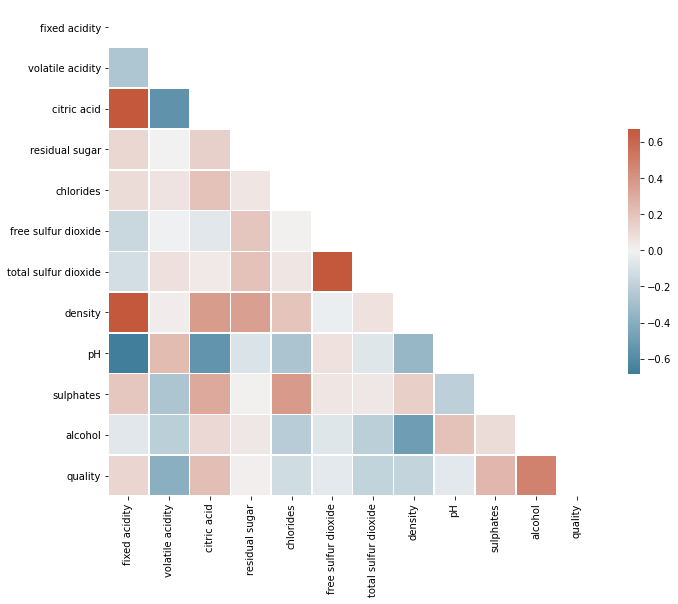

In [554]:
corr_white_wine = X_train.iloc[:,:].corr()

mask = np.triu(np.ones_like(corr_red_wine, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(corr_red_wine, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}); # Draw the heatmap with the mask and correct aspect ratio

### Insights:

#### If we look at this correlation matrix can percept that there are some features that can be removed because the correlation is insignificant. Let's see the significant features. 
- ```fixed acidity``` with ```citric acid```
- ```fixed acidity``` with ```pH```
- ```fixed acidity``` with ```density```
- ```citric acidity``` with ```pH```
- ```free sulfur dioxide``` with ```total sulfur dioxide```
- ```density``` with ```alcohol```

#### Now, our columns will be just:
- fixed acidity, density, citric acid, volatile acidity, pH, free sulfur dioxide, total sulfur dioxide, alcohol and quality.
- We remove 3 columns.

In [555]:
X_train = X_train.drop(['residual sugar'], axis = 1)
X_train = X_train.drop(['chlorides'], axis = 1)
X_train = X_train.drop(['sulphates'], axis = 1)

In [556]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
1610,7.5,0.32,0.49,44.0,109.0,0.99060,3.07,12.5
403,7.1,0.27,0.31,55.0,252.0,1.00000,3.07,8.7
541,7.2,0.46,0.65,76.0,192.0,0.99760,3.16,8.7
1174,7.2,0.26,0.26,49.0,214.0,0.99860,3.41,10.0
3241,5.8,0.30,0.42,19.0,113.0,0.98871,3.10,12.6


#### Let's normalize the columns that we identify previously

In [557]:
red_1_min_max_scaled = X_train # Shallow copy
  
# apply normalization techniques by column x1,x2,x3...
# The columns that will be normalized: total sulfur dioxide, free sulfur dioxide and volatile acidity

column_1 = 'total sulfur dioxide'
column_2 = 'free sulfur dioxide'
column_3 = 'volatile acidity'

red_1_min_max_scaled[column_1] = (red_1_min_max_scaled[column_1] - red_1_min_max_scaled[column_1].min()) / (red_1_min_max_scaled[column_1].max() - red_1_min_max_scaled[column_1].min())    
red_1_min_max_scaled[column_2] = (red_1_min_max_scaled[column_2] - red_1_min_max_scaled[column_2].min()) / (red_1_min_max_scaled[column_2].max() - red_1_min_max_scaled[column_2].min())    
red_1_min_max_scaled[column_3] = (red_1_min_max_scaled[column_3] - red_1_min_max_scaled[column_3].min()) / (red_1_min_max_scaled[column_3].max() - red_1_min_max_scaled[column_3].min())    

# view normalized data
display(red_1_min_max_scaled)

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
1610,7.5,0.259459,0.49,0.146341,0.232019,0.99060,3.07,12.5
403,7.1,0.205405,0.31,0.184669,0.563805,1.00000,3.07,8.7
541,7.2,0.410811,0.65,0.257840,0.424594,0.99760,3.16,8.7
1174,7.2,0.194595,0.26,0.163763,0.475638,0.99860,3.41,10.0
3241,5.8,0.237838,0.42,0.059233,0.241299,0.98871,3.10,12.6
...,...,...,...,...,...,...,...,...
3767,6.9,0.345946,0.17,0.198606,0.410673,0.99754,3.08,9.4
3649,7.0,0.227027,0.37,0.111498,0.271462,0.99058,3.26,12.3
1481,6.6,0.183784,0.24,0.083624,0.266821,0.99420,3.37,10.1
1834,6.4,0.140541,0.30,0.142857,0.350348,0.99490,3.60,10.6


In [558]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
1610,7.5,0.259459,0.49,0.146341,0.232019,0.99060,3.07,12.5
403,7.1,0.205405,0.31,0.184669,0.563805,1.00000,3.07,8.7
541,7.2,0.410811,0.65,0.257840,0.424594,0.99760,3.16,8.7
1174,7.2,0.194595,0.26,0.163763,0.475638,0.99860,3.41,10.0
3241,5.8,0.237838,0.42,0.059233,0.241299,0.98871,3.10,12.6


In [559]:
y_train.value_counts()

medium    3174
low        128
high       126
Name: level, dtype: int64

## 5. Training our model:

#### Feature engineering of X_test:

In [560]:
X_test = X_test.drop(['residual sugar'], axis = 1)
X_test = X_test.drop(['chlorides'], axis = 1)
X_test = X_test.drop(['sulphates'], axis = 1)

red_2_min_max_scaled = X_test

column_1 = 'total sulfur dioxide'
column_2 = 'free sulfur dioxide'
column_3 = 'volatile acidity'

red_2_min_max_scaled[column_1] = (red_2_min_max_scaled[column_1] - red_2_min_max_scaled[column_1].min()) / (red_2_min_max_scaled[column_1].max() - red_2_min_max_scaled[column_1].min())    
red_2_min_max_scaled[column_2] = (red_2_min_max_scaled[column_2] - red_2_min_max_scaled[column_2].min()) / (red_2_min_max_scaled[column_2].max() - red_2_min_max_scaled[column_2].min())    
red_2_min_max_scaled[column_3] = (red_2_min_max_scaled[column_3] - red_2_min_max_scaled[column_3].min()) / (red_2_min_max_scaled[column_3].max() - red_2_min_max_scaled[column_3].min())    


## For this problem we'll use KNN algorithm

#### Making the prediction based on X_Train

In [561]:
knn = KNeighborsClassifier(n_neighbors = 6) # Selecting the amount of neighbors
knn.fit(X_train, y_train) # Training our model
X_train

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
1610,7.5,0.259459,0.49,0.146341,0.232019,0.99060,3.07,12.5
403,7.1,0.205405,0.31,0.184669,0.563805,1.00000,3.07,8.7
541,7.2,0.410811,0.65,0.257840,0.424594,0.99760,3.16,8.7
1174,7.2,0.194595,0.26,0.163763,0.475638,0.99860,3.41,10.0
3241,5.8,0.237838,0.42,0.059233,0.241299,0.98871,3.10,12.6
...,...,...,...,...,...,...,...,...
3767,6.9,0.345946,0.17,0.198606,0.410673,0.99754,3.08,9.4
3649,7.0,0.227027,0.37,0.111498,0.271462,0.99058,3.26,12.3
1481,6.6,0.183784,0.24,0.083624,0.266821,0.99420,3.37,10.1
1834,6.4,0.140541,0.30,0.142857,0.350348,0.99490,3.60,10.6


In [562]:
y_pred = knn.predict(X_train) # Predicting the X_train
y_pred, knn.score(X_train, y_train) # The y predict based on X_train and its score

(array(['medium', 'medium', 'medium', ..., 'medium', 'medium', 'medium'],
       dtype=object),
 0.9299883313885647)

In [563]:
new_prediction = knn.predict(X_test)  # Predicting the X_train
new_prediction, knn.score(X_test, y_test)  # The y predict based on X_train and its score

(array(['medium', 'medium', 'medium', ..., 'medium', 'medium', 'medium'],
       dtype=object),
 0.9170068027210885)

#### Testing algorithm to *k* neighbors:

In [564]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(range(1, 9)):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

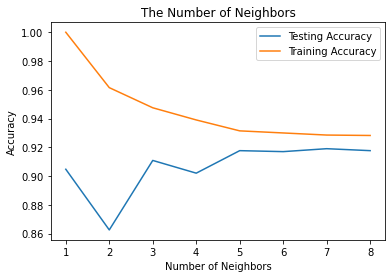

In [565]:
plt.title('The Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 6. Conclusion:

### _After plot the train and test accuracy we can conclude that to this problem, for yet, the better number of neighbors is 7_.

In [566]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
final_train_accuracy = knn.score(X_train, y_train)
final_test_accuracy = knn.score(X_test, y_test)

In [567]:
acurracy = round(final_test_accuracy*100, 2)
print(f'The accuracy of our model is: {acurracy}%')

The accuracy of our model is: 91.9%
